In [33]:
###################################################################################
## Utilisation dataset serre 2 (avec la commande de pompe à air)

import numpy
import pystore

from datetime import *
import os
import os.path

import pandas as pd
from dataclasses import make_dataclass


storepath = "../store"
print("using store at " + storepath) 
if not os.path.exists(storepath):
    os.mkdir(storepath)

pystore.set_path(storepath)
store = pystore.store('serre_store')

# Access a collection (create it if not exist)
collection = store.collection('serre2')
SerreData = make_dataclass("SerreData", [("TIME", datetime), ("TEMPERATURE", float), ("LIGHT", float), 
          ("HUMIDITY", float), ("SOIL", float), ("LIGHTCMD", int), ("PUMPCMD", int)])

# read collection
readdf = collection.item("serre2")
print(readdf.data.loc[(datetime.now() - timedelta(hours=3)):].compute().agg( {'SOIL':['mean','std'], 'LIGHT': ['min','max','mean'], 'HUMIDITY':['min','max','mean','std']}))
print(readdf.data.loc[(datetime.now() - timedelta(days=5)):].compute().agg( {'SOIL':['mean','std','min','max'],  'LIGHT':['min','max','mean'], 'HUMIDITY':['min','max','mean','std']}))


print(readdf.data[['LIGHT', 'HUMIDITY', 'TEMPERATURE']].resample('3h').mean().tail())


using store at ../store
            SOIL        LIGHT   HUMIDITY
mean  413.932642   952.404145  92.502073
std     6.929002          NaN   2.226403
min          NaN   882.000000  90.200000
max          NaN  1006.000000  96.500000
            SOIL        LIGHT   HUMIDITY
mean  413.932642   952.404145  92.502073
std     6.929002          NaN   2.226403
min   390.000000   882.000000  90.200000
max   441.000000  1006.000000  96.500000
                          LIGHT   HUMIDITY  TEMPERATURE
2021-07-04 09:00:00  939.120301  93.077444    25.526316
2021-07-04 12:00:00  981.850000  91.226667    25.225000


In [34]:
keymetrics = readdf.data.loc[(datetime.now() - timedelta(minutes=30)):][['LIGHT', 'LIGHTCMD', 'PUMPCMD', 'HUMIDITY', 'TEMPERATURE', 'SOIL', 'TIME']].resample('1min').mean().compute()
print(keymetrics)

                          LIGHT  LIGHTCMD     PUMPCMD   HUMIDITY  TEMPERATURE  \
2021-07-04 09:39:00         NaN       NaN         NaN        NaN          NaN   
2021-07-04 09:40:00         NaN       NaN         NaN        NaN          NaN   
2021-07-04 09:41:00         NaN       NaN         NaN        NaN          NaN   
2021-07-04 09:42:00         NaN       NaN         NaN        NaN          NaN   
2021-07-04 09:43:00         NaN       NaN         NaN        NaN          NaN   
...                         ...       ...         ...        ...          ...   
2021-07-04 12:05:00  985.500000       NaN  255.000000  90.833333    25.000000   
2021-07-04 12:06:00  982.714286       NaN  109.285714  90.957143    24.957143   
2021-07-04 12:07:00  983.666667       NaN    0.000000  91.433333    25.050000   
2021-07-04 12:08:00  981.500000       NaN    0.000000  92.850000    25.200000   
2021-07-04 12:09:00  977.400000       NaN    0.000000  94.220000    25.360000   

                           

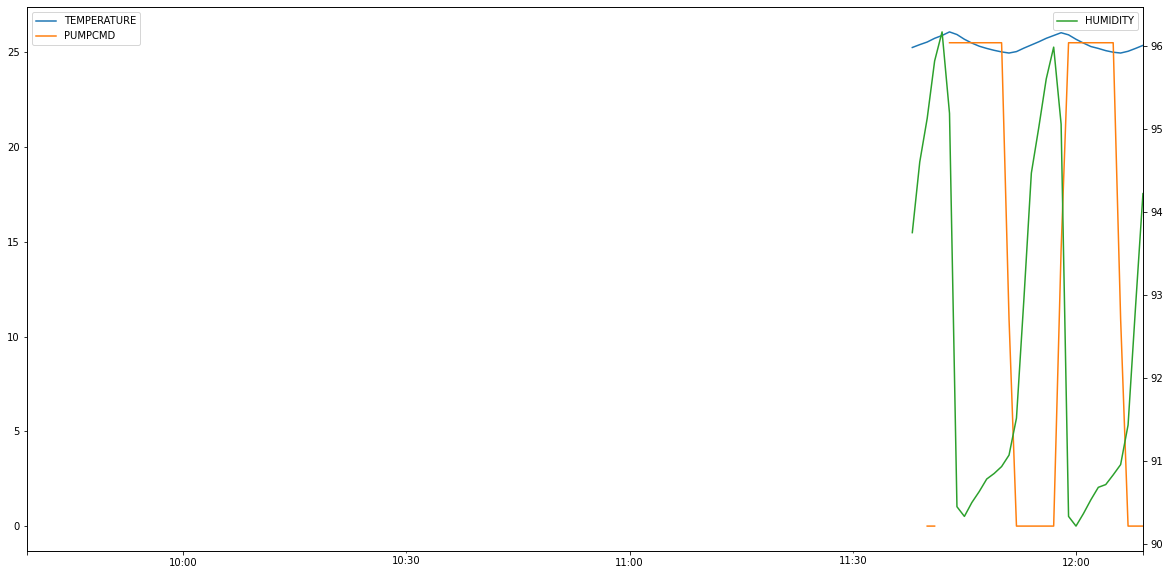

In [35]:
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.figure(figsize=(20,10))
keymetrics.TEMPERATURE.plot()
(keymetrics.PUMPCMD / 10).plot()
plt.legend()
keymetrics.HUMIDITY.plot(secondary_y=True)
plt.legend()
